# Example: REV analysis for permeability

This example demonstrates how to perform REV analysis for permeability, calculated using MEF module.

In [1]:
from julia.api import Julia
jl = Julia(compiled_modules=False)
from revanalyzer import REVAnalyzer
from revanalyzer.generators import generate_permeability_mef
from revanalyzer.metrics import Permeability

Permeability for subcuts is generated using the external application. So, instead of using generate() method from REVAnalyzer class, one needs to run generator function generate_permeability_mef. This function computes
permeability value (in mD) for each subcube, given by parameters 'cut_step' and 'sREV_max_size'. The results are saved in the same way as for the metrics generated inside REVAnalizer library.

In [4]:
#input data for generator function

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = 300 #image linear size. Note, that only cubical images can be analyzed. 
cut_step = 50 # increment step of subcube size
sREV_max_size = 200 #maximal subcube size for which sREV analysis is performed (L_{sREV}).
inputdir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'
exe_path_ccm = '/home/azubov/pnm_extractor/pore-network-extraction/build/bin/extractor_example' #path to PNM-extractor
exe_path_mef = '/home/azubov/mef/fluid-transport-in-pore-networks/build/' #path to MEF directory
exe_mef = './bin/flow_simulator_example' #path to MEF exe file
directions = 'x' #could be 'x', 'y', 'z' or 'all'. If label of this parameter is all, permeability values are
                 #generated for all 3 possible flow directions.
n_threads = 48 #number of CPU cores used by FDMSS, default: 1
resolution = 1. #resolution of studied sample (unitless), default: 1.
length_unit_type = 'UM' #units of resolution. Can be 'NM', 'UM', 'MM' and 'M', default: 'M'
                       #Note, that default 'resolution' and 'length_unit_type' values ensure output pore and throat
                       #radii values in voxel units.
show_time = True #default: False. Added to monitor time cost for large images.


In [5]:
mef_output = generate_permeability_mef(image, directions, size, cut_step, sREV_max_size, exe_path_ccm, exe_path_mef, 
                                       exe_mef, n_threads, resolution, length_unit_type, inputdir, outputdir, 
                                       show_time)

Size  300 , run time: 
--- 9.639673471450806 seconds ---
Size  50 , run time: 
--- 1.0653536319732666 seconds ---
Size  100 , run time: 
--- 3.9256606101989746 seconds ---
Size  150 , run time: 
--- 11.189573287963867 seconds ---
Size  200 , run time: 
--- 26.440512657165527 seconds ---
Size  250 , run time: 
--- 5.577166795730591 seconds ---


In [6]:
#output MEF files are not removed and saved in the directory (may be for future multiphase flow analysis)
print(mef_output)

output/ceramic300/mef_output


In [8]:
#metric and analyzer inizialization. 
#Note, that 'outputdir' should be the same as in generator function to have access to generated data for subcubes. 
all_directions = False #flag indicating if generation over 3 flow directions was done by external generator.
                       #It must be False, if in generator function input directions = 'x', 'y' or 'z'. 
                       #It must be True, if directions = 'all'. Default: True.

metric = Permeability(all_directions)

analyzer = REVAnalyzer(metric, image, size, cut_step, sREV_max_size, inputdir, outputdir)

In [9]:
#Check out if we can read the data generated by external generator.
cut_size = 50
cut_id = 1
value = analyzer.read(cut_size, cut_id)
print(value)

2876.44


In [10]:
#fix thresholds and analyze generated data
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

In [11]:
#get mean, std and normed std values for different cut sizes
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)

{300: 1059.95, 50: 904.553888888889, 100: 943.7656666666667, 150: 1028.708111111111, 200: 1038.8208888888887, 250: 980.129}
{50: 725.915201360239, 100: 243.09574059022734, 150: 170.40793304137014, 200: 109.6415906401342}
{50: 0.8025118351455199, 100: 0.2575806147397048, 150: 0.1656523664981235, 200: 0.1055442683265694}
150
50
50


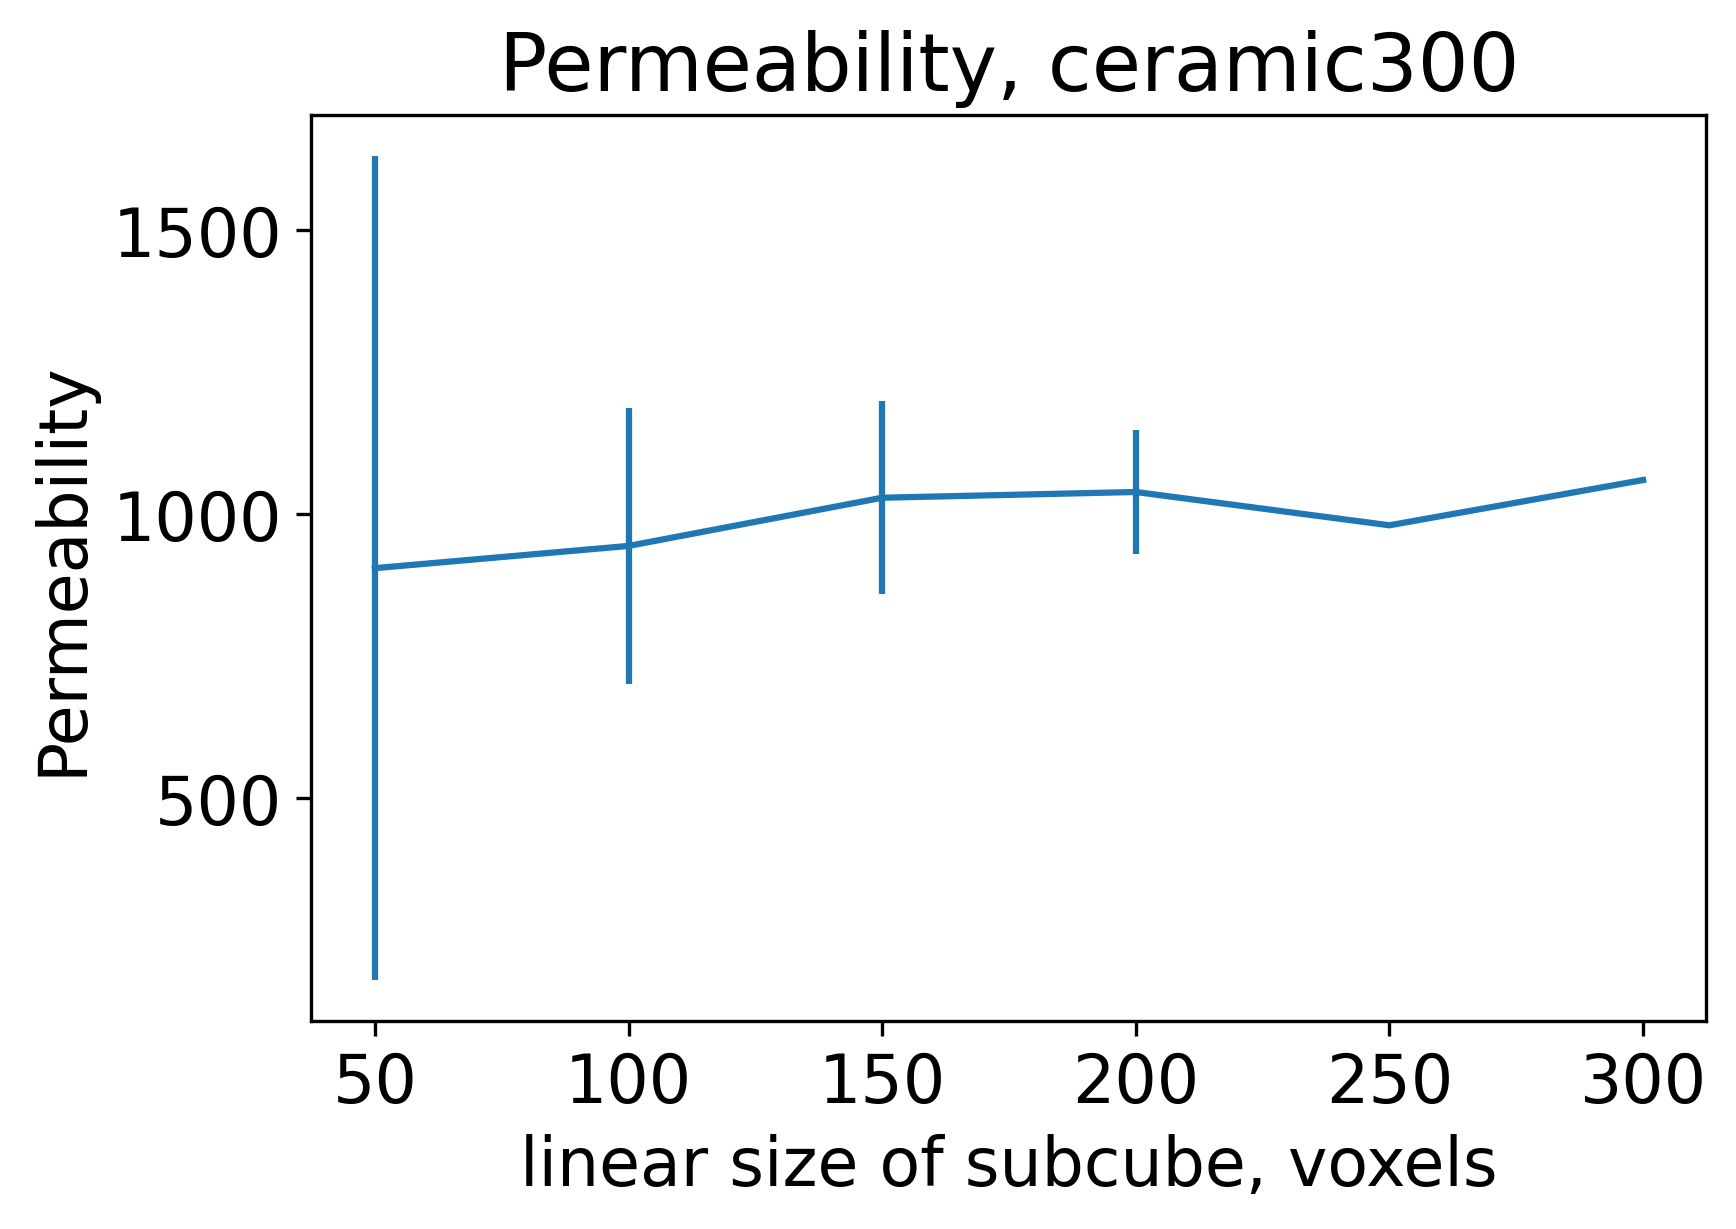

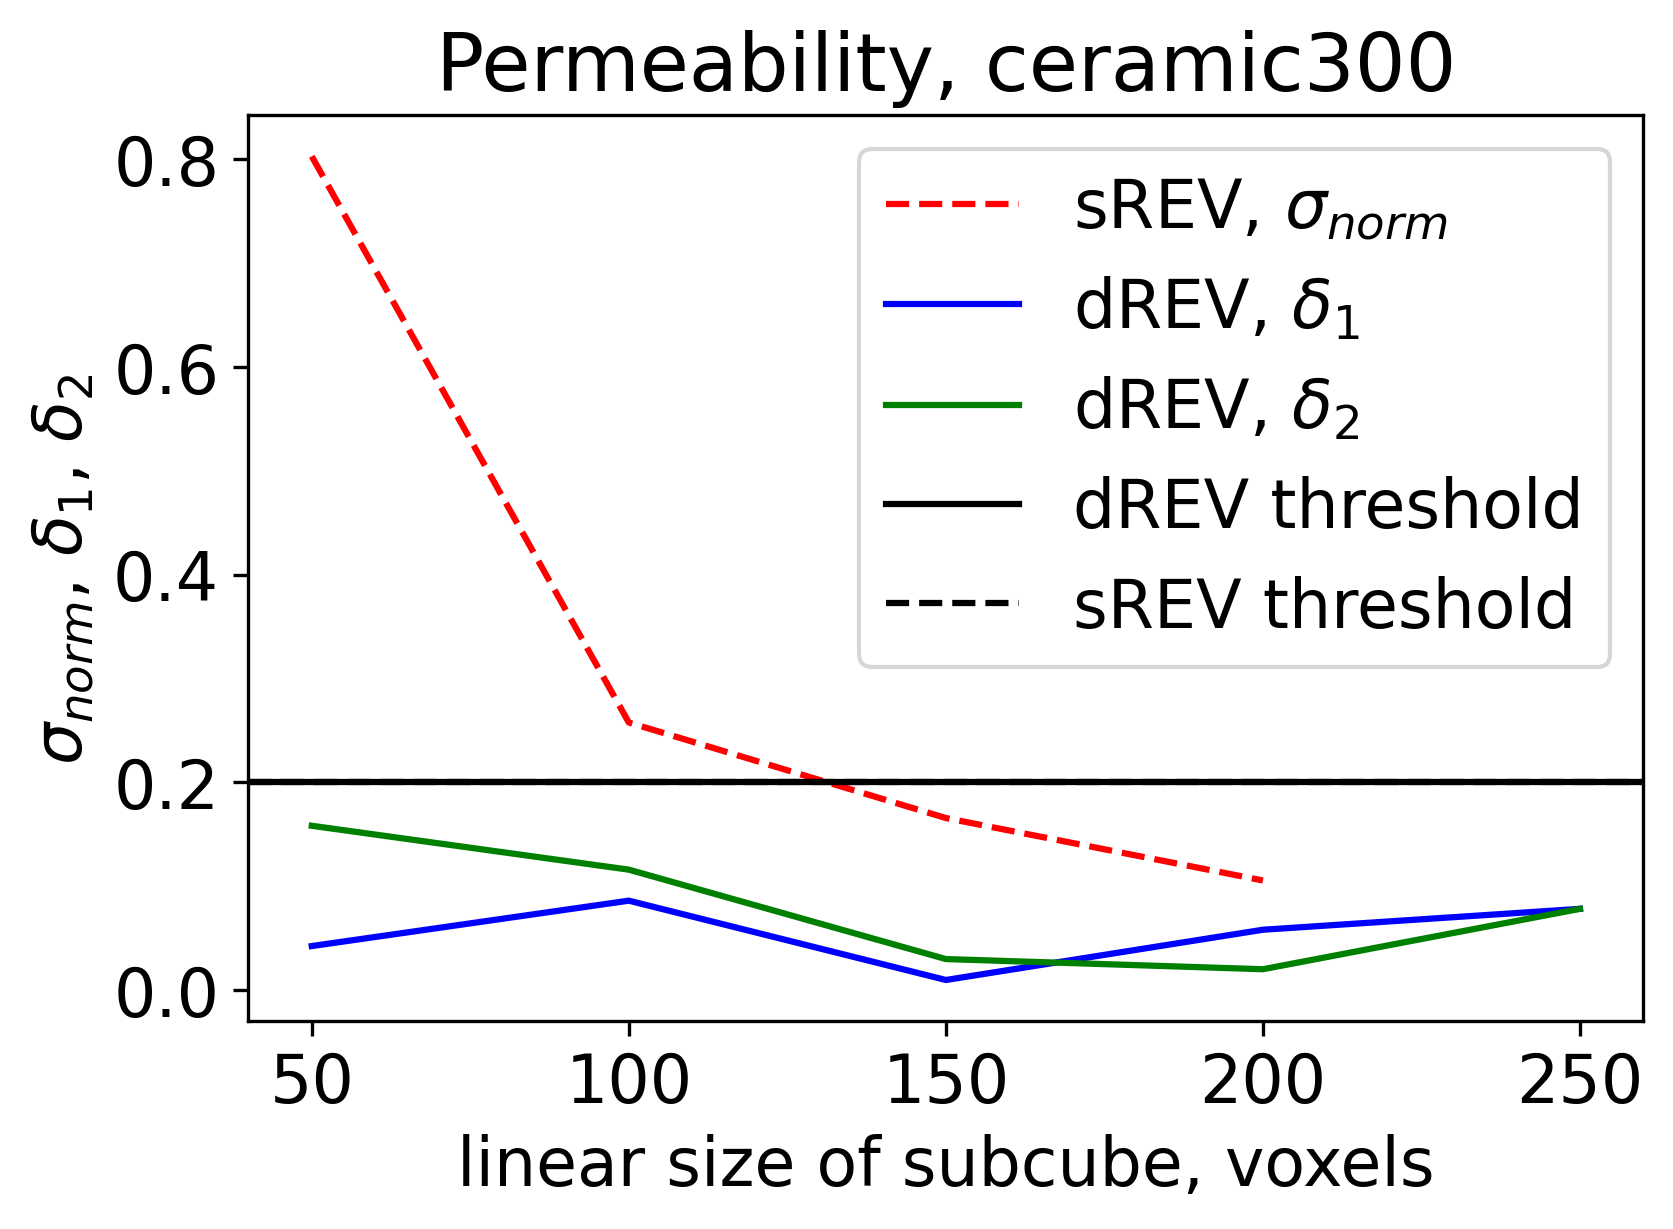

In [12]:
analyzer.show_results()

In [13]:
#Now, we can generate permeability data in 3 flow directions.
directions = 'all'
mef_output = generate_permeability_mef(image, directions, size, cut_step, sREV_max_size, exe_path_ccm, exe_path_mef, 
                                       exe_mef, n_threads, resolution, length_unit_type, inputdir, outputdir, 
                                       show_time)

Size  300 , run time: 
--- 9.604145050048828 seconds ---
Size  50 , run time: 
--- 1.0744831562042236 seconds ---
Size  100 , run time: 
--- 4.087926387786865 seconds ---
Size  150 , run time: 
--- 11.958445310592651 seconds ---
Size  200 , run time: 
--- 26.297208786010742 seconds ---
Size  250 , run time: 
--- 5.408122301101685 seconds ---
Size  300 , run time: 
--- 9.812790393829346 seconds ---
Size  50 , run time: 
--- 1.1141564846038818 seconds ---
Size  100 , run time: 
--- 3.8585379123687744 seconds ---
Size  150 , run time: 
--- 11.612384557723999 seconds ---
Size  200 , run time: 
--- 26.435696601867676 seconds ---
Size  250 , run time: 
--- 5.595110893249512 seconds ---
Size  300 , run time: 
--- 9.975909233093262 seconds ---
Size  50 , run time: 
--- 1.11421799659729 seconds ---
Size  100 , run time: 
--- 3.844163417816162 seconds ---
Size  150 , run time: 
--- 11.966813564300537 seconds ---
Size  200 , run time: 
--- 26.83462643623352 seconds ---
Size  250 , run time: 
--- 

In [15]:
#Then flag all_direction must be True.
all_directions = True
metric = Permeability(all_directions)

analyzer = REVAnalyzer(metric, image, size, cut_step, sREV_max_size, inputdir, outputdir)

In [16]:
#Now we have 3 metric values for each subcube, correpoding to x, y and z directions.
cut_size = 50
cut_id = 1
value = analyzer.read(cut_size, cut_id)
print(value)

[2882.09, 1898.38, 2565.11]


In [17]:
analyzer.analyze(dREV_threshold, sREV_threshold)
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)

{300: [1059.95, 845.823, 810.105], 50: [881.1326666666668, 818.8397555555556, 746.9883333333333], 100: [943.7656666666667, 708.395, 680.8816666666667], 150: [1028.708111111111, 787.6407777777778, 765.192111111111], 200: [1038.8208888888887, 828.403, 794.6498888888889], 250: [980.129, 796.157, 732.999]}
{50: [741.6282345575099, 759.1675755670448, 716.74465291545], 100: [243.09574059022734, 269.55352162294844, 127.30572005478255], 150: [170.40793304137014, 133.2841656001507, 96.40855555100957], 200: [109.6415906401342, 92.11493205652262, 86.04268196197673]}
{50: 0.9595125130228942, 100: 0.38051302115761465, 150: 0.1692194835013418, 200: 0.11119579728287152}
150
50
50


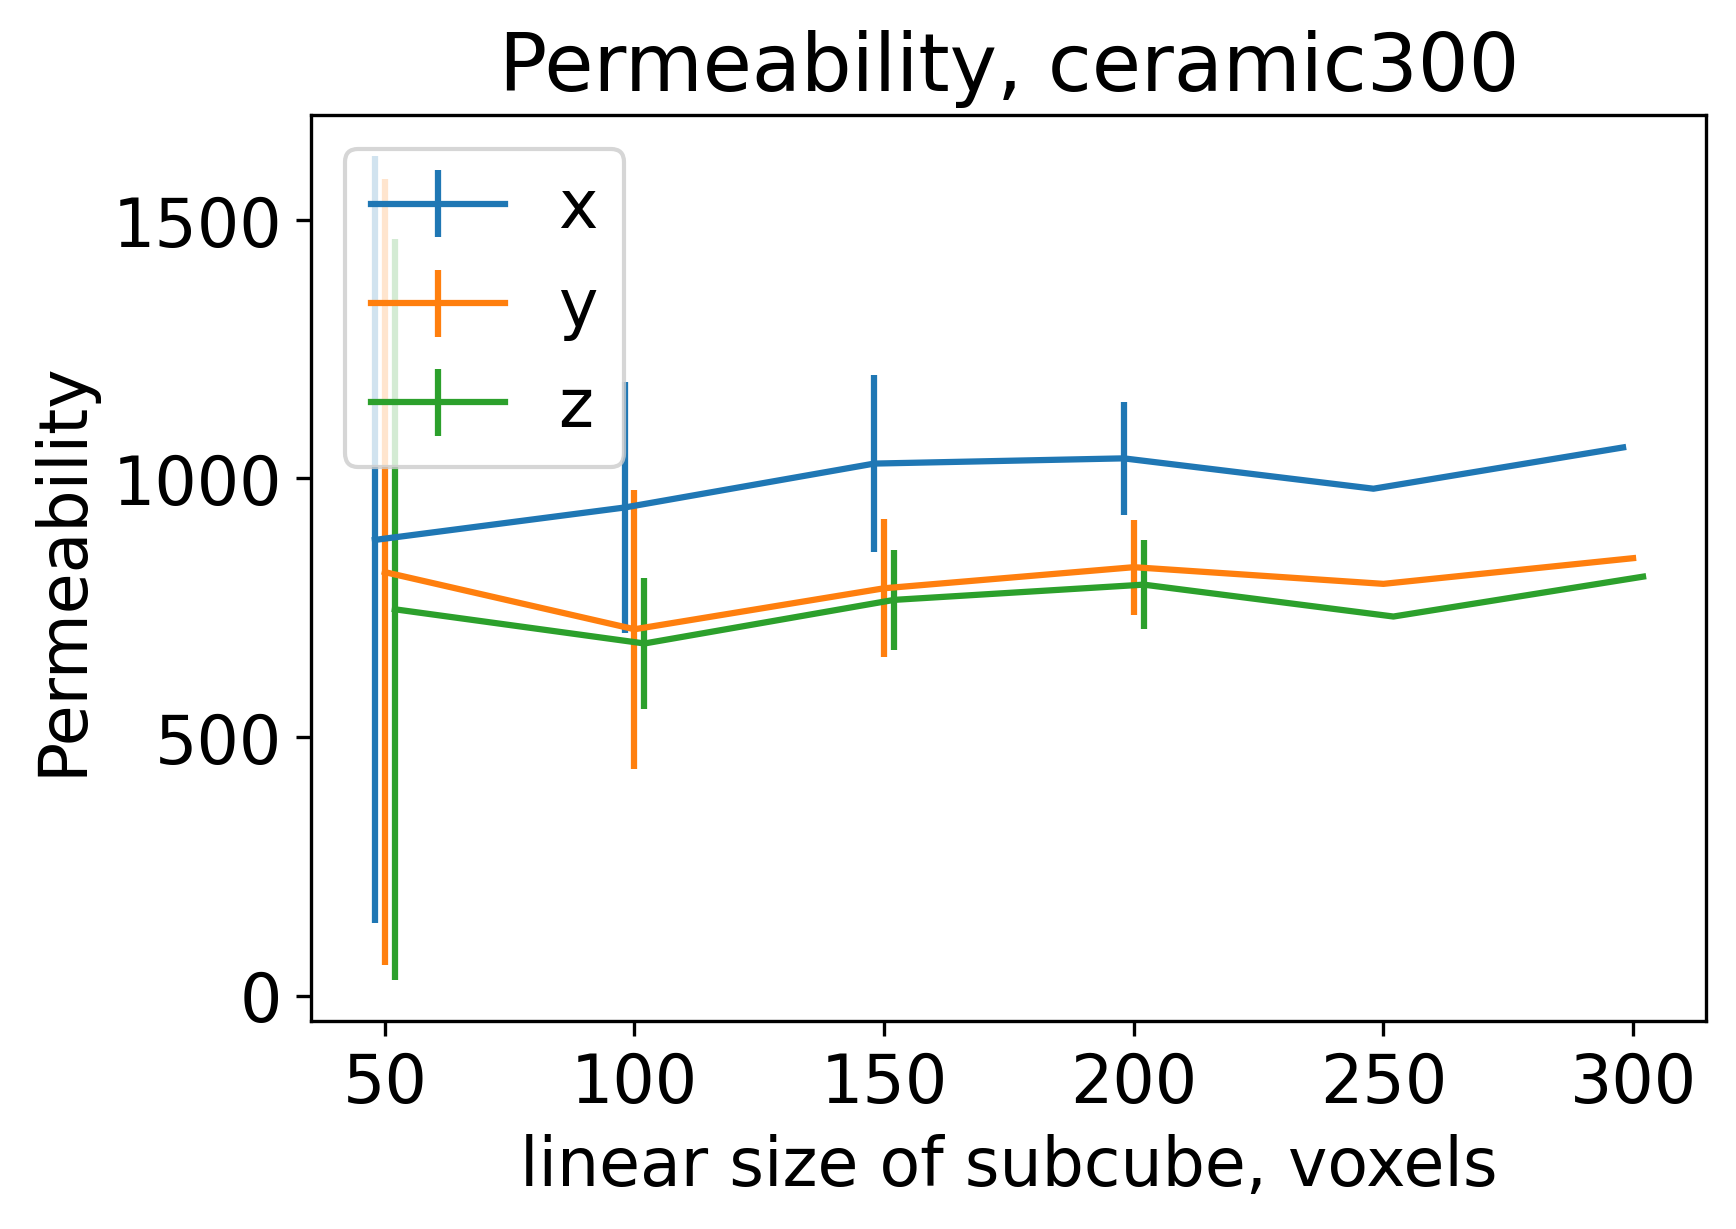

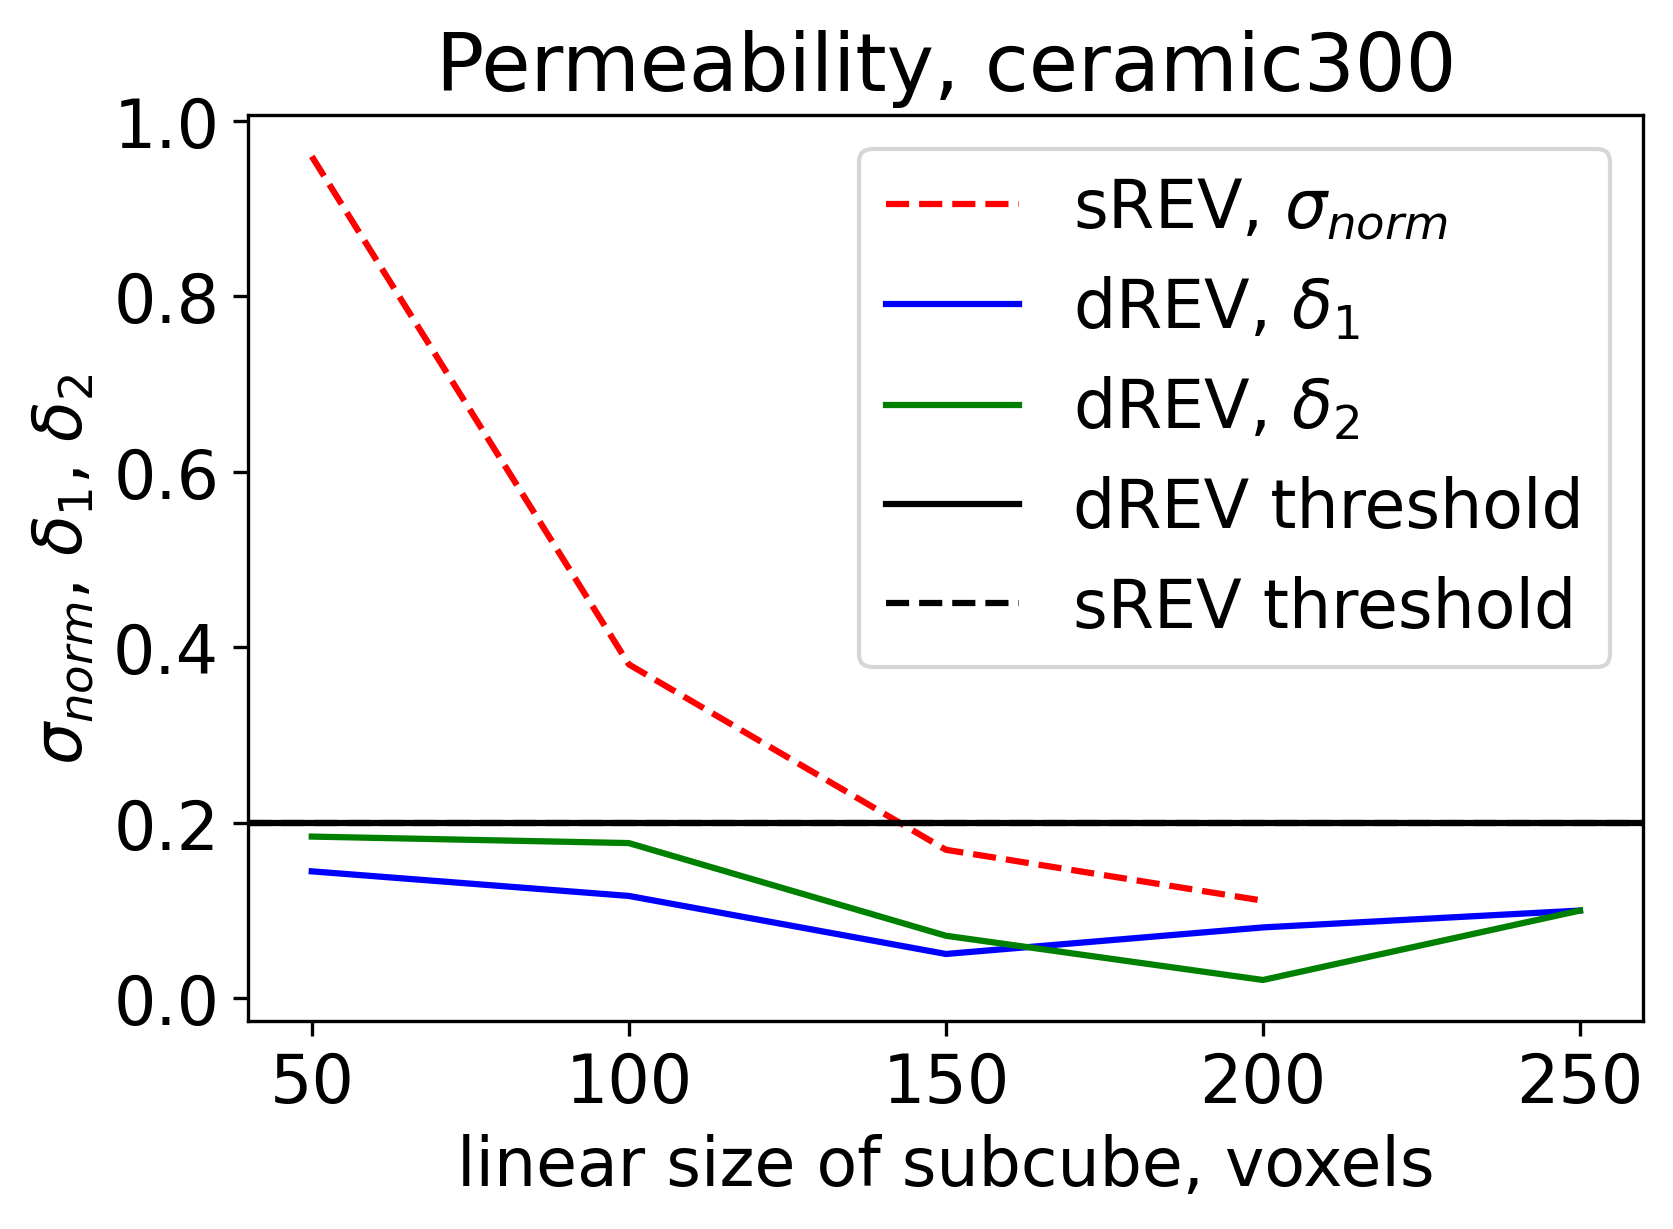

In [18]:
analyzer.show_results()